In [1]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset, random_split

# Summary-like from Tensorflow
from torchsummary import summary

# Import Numpy
import numpy as np
# Plot Import
import matplotlib.pyplot as plt
# For timer
import time
# Import OS
import os
# import local libs
import ecg_tools_lite as et

from statistics import mean

# WFDB
import wfdb

if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')

In [2]:
ecg_modded_06, ecg_untouched_06 = et.get_ecg_with_split('118e06', samp_freq=1024, norm_type='')
ecg_modded_24, ecg_untouched_24 = et.get_ecg_with_split('118e24', samp_freq=1024, norm_type='')

In [3]:
sample = torch.from_numpy(ecg_modded_06)

In [4]:
mean = ecg_modded_06.mean()
std = ecg_modded_06.std()
min_val = ecg_modded_06.min()
max_val = ecg_modded_06.max()
print( mean )
print( std )
print( min_val )
print( max_val )



-6.653124534970238
1.0670778518330393
-10.925
-2.07


In [5]:
mean = sample.mean()
std = sample.std()
min_val = sample.min()
max_val = sample.max()
print( mean )
print( std )
print( min_val )
print( max_val )



tensor(-6.6531, dtype=torch.float64)
tensor(1.0671, dtype=torch.float64)
tensor(-10.9250, dtype=torch.float64)
tensor(-2.0700, dtype=torch.float64)


Go read this article: 
https://stats.stackexchange.com/questions/178626/how-to-normalize-data-between-1-and-1

In [38]:
sig_x = et.load_signal('118e06', folder='')
sig_x = sig_x[0:1024]
sig_y = et.norm_global_prime(sig_x)

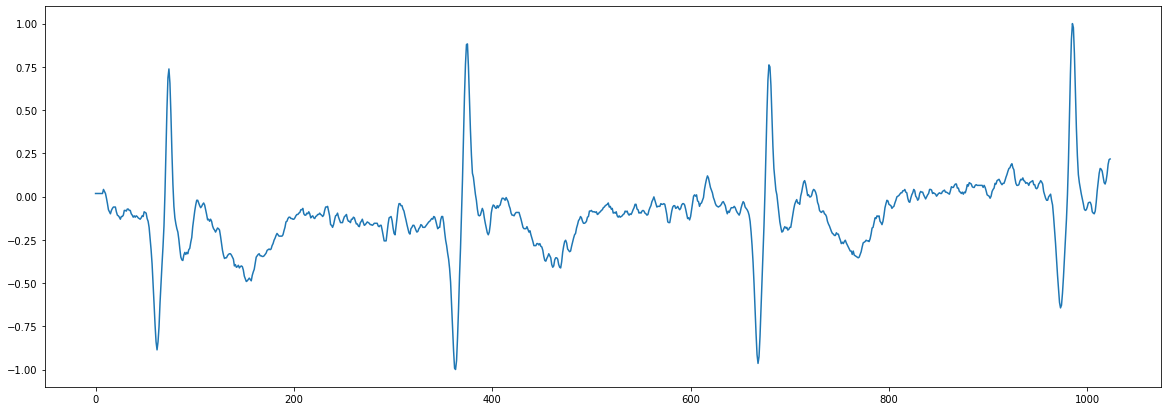

In [39]:
plt.figure( figsize=(20,7) )
plt.plot( sig_y[0:1024])

In [33]:
min_val = sig_y.min()
for i, data in enumerate( sig_y ):
    if data == min_val:
        print( f"{i} = {data}" )
        break

580686 = [-1.]


In [35]:
e24 = np.load('all_none_fs1024_e24.npy')
e24 = torch.from_numpy(e24)
# Reshape e24
e24 = e24.view( (e24.shape[0], e24.shape[2], e24.shape[1]))

In [36]:
# e24 shape
print( f"Original e24: {e24.shape}" )
# normalize
e24_normed = et.norm_global_prime(e24)

# Convert the shape to torch acceptable format (batch, in_channel, timestamps)
def norm_sig( ecg_set ):
    ecg_set_normed = ecg_set
    
    for i, sig in enumerate(ecg_set):
        sig = et.norm_global_prime(sig)
        ecg_set_normed[i] = sig
    
    return ecg_set_normed

e24_norm_prime = norm_sig(e24)
print( f" e24_norm_prime: {e24_norm_prime.shape}")

Original e24: torch.Size([5544, 1, 1024])
 e24_norm_prime: torch.Size([5544, 1, 1024])


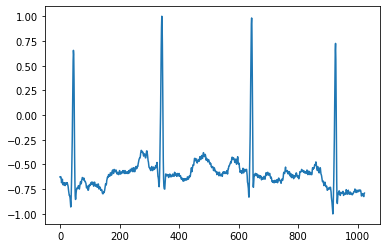

In [38]:
plt.plot( e24_norm_prime[0][0] )